<a href="https://colab.research.google.com/github/FunmiSomoye/Volcanic-Eruptions-Analysis/blob/main/Volcano_Eruption_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Start

**Hypothesis**

1. The largest volcanic activities are along a subduction zone
2. The Subduction Zone has the highest number of erupted volcanoes
3. There are more reported volcanoes in recent years than in the past (not just because of increased volcanic activity, but also because of improved technology and communication)

**Major Assumptions**

For dates, Google search has confirmed some of the recent dates as seen in the dataframe. The Github repository where the data was sourced from says this is the updated data for 2020. Also, the negative epoch dates are for years before 1960. I would leave the dates as is, but as integer, to allow for thos dates earlier than the set epoch reference date. 

The information from Smithsonian Institute is that these are data from over 10,000 years ago.

Voclanoes without end_year dates are still active.

###Import and Set Dependencies

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

#####***Import Data***

In [ ]:
volcano = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/volcano.csv')
eruptions = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv')
events = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/events.csv')

###Basic Data Exploration

#####***volcano***

In [ ]:
volcano.head().T

,0,1,2,3,4
volcano_number,283001,355096,342080,213004,321040
volcano_name,Abu,Acamarachi,Acatenango,Acigol-Nevsehir,Adams
primary_volcano_type,Shield(s),Stratovolcano,Stratovolcano(es),Caldera,Stratovolcano
last_eruption_year,-6850,Unknown,1972,-2080,950
country,Japan,Chile,Guatemala,Turkey,United States
region,"Japan, Taiwan, Marianas",South America,México and Central America,Mediterranean and Western Asia,Canada and Western USA
subregion,Honshu,"Northern Chile, Bolivia and Argentina",Guatemala,Turkey,USA (Washington)
latitude,34.5,-23.292,14.501,38.537,46.206
longitude,131.6,-67.618,-90.876,34.621,-121.49
elevation,641,6023,3976,1683,3742


In [ ]:
volcano.shape

(958, 26)

There are 958 rows and 26 columns <br/>
What is a major rock in one volcano is a minor rock for another. <br/>
Some volcanoes had no one living close to it.

In [ ]:
volcano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   volcano_number            958 non-null    int64  
 1   volcano_name              958 non-null    object 
 2   primary_volcano_type      958 non-null    object 
 3   last_eruption_year        958 non-null    object 
 4   country                   958 non-null    object 
 5   region                    958 non-null    object 
 6   subregion                 958 non-null    object 
 7   latitude                  958 non-null    float64
 8   longitude                 958 non-null    float64
 9   elevation                 958 non-null    int64  
 10  tectonic_settings         958 non-null    object 
 11  evidence_category         958 non-null    object 
 12  major_rock_1              958 non-null    object 
 13  major_rock_2              958 non-null    object 
 14  major_rock

There are no missing values in the volcano set.

In [ ]:
#see number of unique values in each column
[(col, volcano[col].nunique()) for col in volcano]

[('volcano_number', 958),
 ('volcano_name', 954),
 ('primary_volcano_type', 26),
 ('last_eruption_year', 342),
 ('country', 89),
 ('region', 19),
 ('subregion', 98),
 ('latitude', 927),
 ('longitude', 941),
 ('elevation', 818),
 ('tectonic_settings', 11),
 ('evidence_category', 5),
 ('major_rock_1', 10),
 ('major_rock_2', 11),
 ('major_rock_3', 11),
 ('major_rock_4', 11),
 ('major_rock_5', 11),
 ('minor_rock_1', 11),
 ('minor_rock_2', 11),
 ('minor_rock_3', 9),
 ('minor_rock_4', 3),
 ('minor_rock_5', 1),
 ('population_within_5_km', 619),
 ('population_within_10_km', 715),
 ('population_within_30_km', 816),
 ('population_within_100_km', 885)]

There are 89 countries (there is a total of 195 in the world), <br/>
19 regions, <br/>
98 subregions, <br/>
954 unique volcano names, <br/>
26 primary volcano types, <br/>
11 tectonic settings, and <br/>
5 evidence categories in this dataset. 

[Text(0, 0, 'Eruption Dated'),
 Text(0, 0, 'Evidence Credible'),
 Text(0, 0, 'Eruption Observed'),
 Text(0, 0, 'Evidence Uncertain'),
 Text(0, 0, 'Unrest / Holocene')]

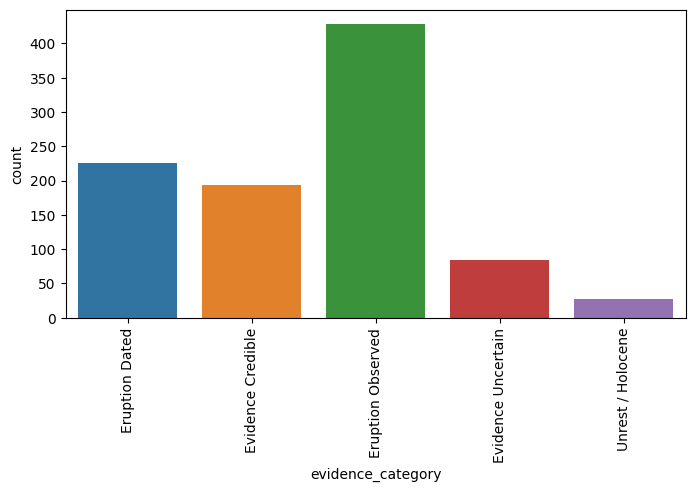

In [ ]:
#visualise the evidence category
fig = plt.figure(figsize=(8, 4)) 
chart=sns.countplot(data=volcano, x='evidence_category')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.title('Evidence Category Frequencies', size = 12)

Volcanoes with Eruption Observed is the largest evidence category, while Holocene is the lowest.

[Text(0, 0, 'Subduction zone / Continental crust (>25 km)'),
 Text(0, 0, 'Intraplate / Continental crust (>25 km)'),
 Text(0, 0, 'Rift zone / Intermediate crust (15-25 km)'),
 Text(0, 0, 'Subduction zone / Crustal thickness unknown'),
 Text(0, 0, 'Rift zone / Oceanic crust (< 15 km)'),
 Text(0, 0, 'Subduction zone / Oceanic crust (< 15 km)'),
 Text(0, 0, 'Subduction zone / Intermediate crust (15-25 km)'),
 Text(0, 0, 'Rift zone / Continental crust (>25 km)'),
 Text(0, 0, 'Intraplate / Oceanic crust (< 15 km)'),
 Text(0, 0, 'Intraplate / Intermediate crust (15-25 km)'),
 Text(0, 0, 'Unknown')]

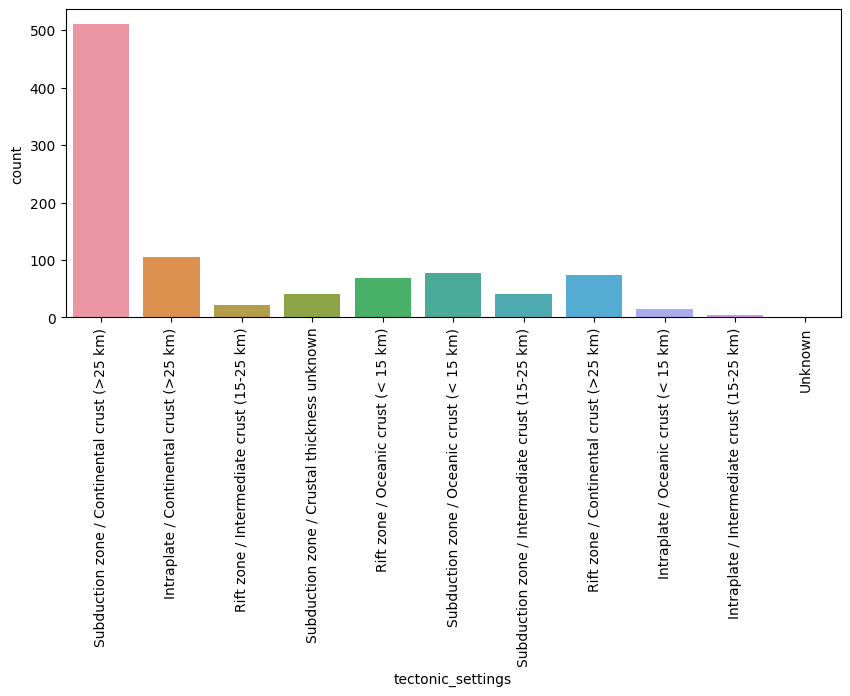

In [ ]:
fig = plt.figure(figsize=(10, 4)) 

chart=sns.countplot(data=volcano, x='tectonic_settings')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

**The most common tectonic seeting is the subduction zone of the continental crust** <br/>
The crust is the outermost major layer of the earth, ranging from about **10 to 65 km in thickness worldwide**. The uppermost 15-35 km of crust is brittle enough to produce earthquakes.

#####Split the tectonic settings for further analysis

<center><img src='https://cdn.britannica.com/s:690x388,c:crop/53/4953-050-0FB97A5C/subduction-zones-Stratovolcanoes-Earth-plate-margins-activity.jpg' height=300 />

<center><img src='https://pressbooks.bccampus.ca/astronomy1105/wp-content/uploads/sites/235/2017/08/OSC_Astro_08_02_RiftZone-2.jpg'height=300 />


In [ ]:
#make a new data copy to work with
tectonic = volcano.copy()

In [ ]:
#reveal new features

#split strings
brackets = tectonic['tectonic_settings'].str.split(('[(+*)]'), expand=True)
crusts = brackets[0].str.split(('/'), expand=True)

#new columns
tectonic['crust_thickness'] = brackets[1]
tectonic['volcanism'] = crusts[0]
tectonic['crust'] = crusts[1]

#delete the tectonic settings column
tectonic = tectonic.drop(['tectonic_settings'], axis=1)

#####***eruptions***

In [ ]:
eruptions.head().T

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
0,266030,Soputan,22354,Confirmed Eruption,NaN,NaN,2020.0,3.0,23.0,Historical Observations,2020.0,4.0,2.0,1.112,124.737
1,343100,San Miguel,22355,Confirmed Eruption,NaN,NaN,2020.0,2.0,22.0,Historical Observations,2020.0,2.0,22.0,13.434,-88.269
2,233020,"Fournaise, Piton de la",22343,Confirmed Eruption,NaN,NaN,2020.0,2.0,10.0,Historical Observations,2020.0,4.0,6.0,-21.244,55.708
3,345020,Rincon de la Vieja,22346,Confirmed Eruption,NaN,NaN,2020.0,1.0,31.0,Historical Observations,2020.0,4.0,17.0,10.830,-85.324
4,353010,Fernandina,22347,Confirmed Eruption,NaN,NaN,2020.0,1.0,12.0,Historical Observations,2020.0,1.0,12.0,-0.370,-91.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11173,324020,Craters of the Moon,21101,Confirmed Eruption,Sunset cone,0.0,-10060.0,NaN,NaN,Radiocarbon (uncorrected),NaN,NaN,NaN,43.420,-113.500
11174,222161,Igwisi Hills,22141,Confirmed Eruption,NE Volcano,1.0,-10450.0,NaN,NaN,Surface Exposure,NaN,NaN,NaN,-4.889,31.933
11175,357121,Quetrupillan,22351,Confirmed Eruption,NaN,3.0,-10658.0,NaN,NaN,Radiocarbon (corrected),NaN,NaN,NaN,-39.496,-71.722
11176,357121,Quetrupillan,22352,Confirmed Eruption,NaN,3.0,-11345.0,NaN,NaN,Radiocarbon (corrected),NaN,NaN,NaN,-39.496,-71.722


There are 11178 rows and 15 columns

In [ ]:
eruptions.describe()

,volcano_number,eruption_number,vei,start_year,start_month,start_day,end_year,end_month,end_day,latitude,longitude
count,11178.000000,11178.000000,8272.000000,11177.000000,10985.000000,10982.000000,4332.000000,4329.000000,4326.000000,11178.000000,11178.000000
mean,300284.371176,15666.905439,1.947897,622.848260,3.450888,7.015025,1917.326639,6.220836,13.315996,16.865778,31.572377
std,52321.193203,3297.612433,1.161098,2482.174317,4.071419,9.645386,157.646408,3.686128,9.831282,30.761752,115.248384
min,210010.000000,10001.000000,0.000000,-11345.000000,0.000000,0.000000,-475.000000,0.000000,0.000000,-77.530000,-179.970000
25%,263310.000000,12817.250000,1.000000,680.000000,0.000000,0.000000,1895.000000,3.000000,4.000000,-6.102000,-77.656000
50%,290050.000000,15650.500000,2.000000,1847.000000,1.000000,0.000000,1957.000000,6.000000,15.000000,17.600000,55.708000
75%,343030.000000,18463.750000,2.000000,1950.000000,7.000000,15.000000,1992.000000,9.000000,21.000000,40.821000,139.394000
max,600000.000000,22355.000000,7.000000,2020.000000,12.000000,31.000000,2020.000000,12.000000,31.000000,85.608000,179.580000


The date seem to be in normal calendar dates. Considering the Github ReadMe said this was a 2020 data, I would leave as integer.

In [ ]:
#see unique values
[(col, eruptions[col].nunique()) for col in eruptions]

[('volcano_number', 931),
 ('volcano_name', 921),
 ('eruption_number', 11176),
 ('eruption_category', 3),
 ('area_of_activity', 2592),
 ('vei', 8),
 ('start_year', 1694),
 ('start_month', 13),
 ('start_day', 32),
 ('evidence_method_dating', 20),
 ('end_year', 455),
 ('end_month', 13),
 ('end_day', 32),
 ('latitude', 915),
 ('longitude', 923)]

In [ ]:
eruptions['eruption_category'].unique()

array(['Confirmed Eruption', 'Uncertain Eruption', 'Discredited Eruption'],
      dtype=object)

#####***Data Combinations***

I would use the eruptions data as my anchor data, combining other dataframes for further analysis where needed.

#####Filter Data

In [ ]:
#anchor dataframe is eruptions
#merge data on eruptions
new_df = eruptions.merge(tectonic, on=['volcano_number', 'volcano_name'], how='inner')

In [ ]:
new_df.head().T

,0,1,2,3,4
volcano_number,266030,266030,266030,266030,266030
volcano_name,Soputan,Soputan,Soputan,Soputan,Soputan
eruption_number,22354,22293,22105,20988,20821
eruption_category,Confirmed Eruption,Confirmed Eruption,Confirmed Eruption,Confirmed Eruption,Confirmed Eruption
area_of_activity,NaN,NaN,NaN,NaN,NaN
vei,NaN,3,3,3,3
start_year,2020,2018,2016,2015,2012
start_month,3,10,1,1,8
start_day,23,2,2,6,26
evidence_method_dating,Historical Observations,Historical Observations,Historical Observations,Historical Observations,Historical Observations


In [ ]:
#use to get column indexes
new_df.columns.get_loc('tectonic_settings')

23

In [ ]:
# drop columns that will not be used in analysis
drop_columns = [2, 4, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
new_df.drop(new_df.columns[drop_columns], axis=1, inplace=True)

In [ ]:
#see number of unique values in each column
[(col, new_df[col].nunique()) for col in new_df]

[('volcano_number', 689),
 ('volcano_name', 687),
 ('eruption_category', 3),
 ('vei', 8),
 ('start_year', 1581),
 ('start_month', 13),
 ('start_day', 32),
 ('evidence_method_dating', 20),
 ('end_year', 450),
 ('end_month', 13),
 ('end_day', 32),
 ('latitude_x', 677),
 ('longitude_x', 683),
 ('primary_volcano_type', 23),
 ('last_eruption_year', 342),
 ('country', 76),
 ('region', 19),
 ('subregion', 95),
 ('latitude_y', 677),
 ('longitude_y', 683),
 ('elevation', 619),
 ('evidence_category', 5),
 ('crust_thickness', 3),
 ('volcanism', 3),
 ('crust', 4)]

#####Investigate why 687 volcano names but 689 volcano numbers

In [ ]:
#check for occurrences of same volcano name but diffeent numbers
new_df[new_df.groupby(['volcano_name'])['volcano_number'].transform('nunique') > 1]

,volcano_number,volcano_name,eruption_category,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude_x,longitude_x,primary_volcano_type,last_eruption_year,country,region,subregion,latitude_y,longitude_y,elevation,evidence_category,crust_thickness,volcanism,crust
4455,353060,"Azul, Cerro",Confirmed Eruption,1.0,2008.0,5.0,29.0,Historical Observations,2008.0,6.0,17.0,-0.920,-91.408,Shield,2008,Ecuador,South America,Galapagos Islands,-0.920,-91.408,1640,Eruption Observed,< 15 km,Rift zone,Oceanic crust
4456,353060,"Azul, Cerro",Confirmed Eruption,1.0,1998.0,9.0,15.0,Historical Observations,1998.0,10.0,21.0,-0.920,-91.408,Shield,2008,Ecuador,South America,Galapagos Islands,-0.920,-91.408,1640,Eruption Observed,< 15 km,Rift zone,Oceanic crust
4457,353060,"Azul, Cerro",Confirmed Eruption,2.0,1979.0,1.0,29.0,Historical Observations,1979.0,3.0,4.0,-0.920,-91.408,Shield,2008,Ecuador,South America,Galapagos Islands,-0.920,-91.408,1640,Eruption Observed,< 15 km,Rift zone,Oceanic crust
4458,353060,"Azul, Cerro",Uncertain Eruption,NaN,1968.0,6.0,12.0,NaN,NaN,NaN,NaN,-0.920,-91.408,Shield,2008,Ecuador,South America,Galapagos Islands,-0.920,-91.408,1640,Eruption Observed,< 15 km,Rift zone,Oceanic crust
4459,353060,"Azul, Cerro",Confirmed Eruption,2.0,1959.0,6.0,29.0,Historical Observations,1959.0,7.0,31.0,-0.920,-91.408,Shield,2008,Ecuador,South America,Galapagos Islands,-0.920,-91.408,1640,Eruption Observed,< 15 km,Rift zone,Oceanic crust
4460,353060,"Azul, Cerro",Confirmed Eruption,NaN,1951.0,7.0,2.0,Historical Observations,NaN,NaN,NaN,-0.920,-91.408,Shield,2008,Ecuador,South America,Galapagos Islands,-0.920,-91.408,1640,Eruption Observed,< 15 km,Rift zone,Oceanic crust
4461,353060,"Azul, Cerro",Confirmed Eruption,0.0,1949.0,0.0,0.0,Historical Observations,NaN,NaN,NaN,-0.920,-91.408,Shield,2008,Ecuador,South America,Galapagos Islands,-0.920,-91.408,1640,Eruption Observed,< 15 km,Rift zone,Oceanic crust
4462,353060,"Azul, Cerro",Confirmed Eruption,0.0,1948.0,6.0,30.0,Historical Observations,NaN,NaN,NaN,-0.920,-91.408,Shield,2008,Ecuador,South America,Galapagos Islands,-0.920,-91.408,1640,Eruption Observed,< 15 km,Rift zone,Oceanic crust
4463,353060,"Azul, Cerro",Confirmed Eruption,3.0,1943.0,4.0,13.0,Historical Observations,1943.0,5.0,11.0,-0.920,-91.408,Shield,2008,Ecuador,South America,Galapagos Islands,-0.920,-91.408,1640,Eruption Observed,< 15 km,Rift zone,Oceanic crust
4464,353060,"Azul, Cerro",Confirmed Eruption,0.0,1940.0,0.0,0.0,Historical Observations,NaN,NaN,NaN,-0.920,-91.408,Shield,2008,Ecuador,South America,Galapagos Islands,-0.920,-91.408,1640,Eruption Observed,< 15 km,Rift zone,Oceanic crust


It is clear that Azul, Cerro has two numbers.

I would ensure to group by name instead of number in all aggregations.

######How many volcanoes are in each erupted category?

In [ ]:
new_df.drop_duplicates(subset=['volcano_name'], keep='last').groupby(['eruption_category'])['volcano_name'].count()

eruption_category
Confirmed Eruption      626
Discredited Eruption      8
Uncertain Eruption       53
Name: volcano_name, dtype: int64

There are 626 volcanoes with confirmed eruptions

#####***Focus on Confirmed Eruptions of eruption_category in Eruptions Only***

In [ ]:
#create data
confirmed_eruptions = new_df[new_df['eruption_category']=='Confirmed Eruption']

#####Data Exploration

In [ ]:
confirmed_eruptions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8556 entries, 0 to 9558
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   volcano_number          8556 non-null   int64  
 1   volcano_name            8556 non-null   object 
 2   eruption_category       8556 non-null   object 
 3   vei                     6682 non-null   float64
 4   start_year              8555 non-null   float64
 5   start_month             8387 non-null   float64
 6   start_day               8386 non-null   float64
 7   evidence_method_dating  8514 non-null   object 
 8   end_year                3460 non-null   float64
 9   end_month               3458 non-null   float64
 10  end_day                 3457 non-null   float64
 11  latitude_x              8556 non-null   float64
 12  longitude_x             8556 non-null   float64
 13  primary_volcano_type    8556 non-null   object 
 14  last_eruption_year      8556 non-null   

In [ ]:
confirmed_eruptions.describe()

,volcano_number,vei,start_year,start_month,start_day,end_year,end_month,end_day,latitude_x,longitude_x,latitude_y,longitude_y,elevation
count,8556.000000,6682.000000,8555.000000,8387.000000,8386.000000,3460.000000,3458.000000,3457.000000,8556.000000,8556.000000,8556.000000,8556.000000,8556.000000
mean,297867.157784,2.035319,496.460432,3.416836,7.053542,1911.127746,6.244072,13.187156,17.089422,36.981990,17.089422,36.981990,2216.107059
std,47186.576335,1.144915,2554.515715,4.075409,9.708433,166.103170,3.685103,9.856874,31.026647,111.864839,31.026647,111.864839,1318.009372
min,210010.000000,0.000000,-11345.000000,0.000000,0.000000,-475.000000,0.000000,0.000000,-77.530000,-179.970000,-77.530000,-179.970000,-2500.000000
25%,263280.000000,1.000000,215.000000,0.000000,0.000000,1892.000000,3.000000,3.000000,-6.645000,-72.117000,-6.645000,-72.117000,1303.000000
50%,285040.000000,2.000000,1827.000000,1.000000,0.000000,1952.000000,6.000000,14.000000,19.421000,55.708000,19.421000,55.708000,1974.000000
75%,343020.000000,2.000000,1945.000000,7.000000,15.000000,1989.000000,9.000000,21.000000,40.730000,139.182250,40.730000,139.182250,2962.000000
max,390140.000000,7.000000,2020.000000,12.000000,31.000000,2020.000000,12.000000,31.000000,71.082000,179.580000,71.082000,179.580000,6879.000000


The latest volcanic eruption was in 2020, on the 31st of December.<br/>
The shortest volcano is below sea level at -2500. the highest is about 6879 metres above sea level.<br/>
The earliest volcano erupted in yr -11345 BCE.

#####Investigate Months showing zero

In [ ]:
confirmed_eruptions[confirmed_eruptions['start_month']==0]

,volcano_number,volcano_name,eruption_category,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude_x,longitude_x,primary_volcano_type,last_eruption_year,country,region,subregion,latitude_y,longitude_y,elevation,evidence_category,crust_thickness,volcanism,crust
35,266030,Soputan,Confirmed Eruption,2.0,1890.0,0.0,0.0,Historical Observations,NaN,NaN,NaN,1.112,124.737,Stratovolcano,2020,Indonesia,Indonesia,Sulawesi,1.112,124.737,1785,Eruption Observed,>25 km,Subduction zone,Continental crust
37,266030,Soputan,Confirmed Eruption,2.0,1833.0,0.0,0.0,Historical Observations,NaN,NaN,NaN,1.112,124.737,Stratovolcano,2020,Indonesia,Indonesia,Sulawesi,1.112,124.737,1785,Eruption Observed,>25 km,Subduction zone,Continental crust
38,266030,Soputan,Confirmed Eruption,2.0,1819.0,0.0,0.0,Historical Observations,NaN,NaN,NaN,1.112,124.737,Stratovolcano,2020,Indonesia,Indonesia,Sulawesi,1.112,124.737,1785,Eruption Observed,>25 km,Subduction zone,Continental crust
40,266030,Soputan,Confirmed Eruption,3.0,1450.0,0.0,0.0,Historical Observations,NaN,NaN,NaN,1.112,124.737,Stratovolcano,2020,Indonesia,Indonesia,Sulawesi,1.112,124.737,1785,Eruption Observed,>25 km,Subduction zone,Continental crust
99,233020,"Fournaise, Piton de la",Confirmed Eruption,2.0,1947.0,0.0,0.0,Historical Observations,NaN,NaN,NaN,-21.244,55.708,Shield,2020,France,Middle East and Indian Ocean,Indian Ocean (western),-21.244,55.708,2632,Eruption Observed,< 15 km,Intraplate,Oceanic crust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9550,210010,West Eifel Volcanic Field,Confirmed Eruption,NaN,-8300.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,50.170,6.850,Maar(s),-8300,Germany,Mediterranean and Western Asia,Western Europe,50.170,6.850,600,Eruption Dated,>25 km,Rift zone,Continental crust
9551,210010,West Eifel Volcanic Field,Confirmed Eruption,NaN,-8740.0,0.0,0.0,Radiocarbon (corrected),NaN,NaN,NaN,50.170,6.850,Maar(s),-8300,Germany,Mediterranean and Western Asia,Western Europe,50.170,6.850,600,Eruption Dated,>25 km,Rift zone,Continental crust
9552,390022,Berlin,Confirmed Eruption,0.0,-8350.0,0.0,0.0,Ar/Ar,NaN,NaN,NaN,-76.050,-136.000,Shield(s),-8350,Antarctica,Antarctica,Antarctica and South Sandwich Islands,-76.050,-136.000,3478,Eruption Dated,>25 km,Intraplate,Continental crust
9553,324010,Black Butte Crater Lava Field,Confirmed Eruption,0.0,-8400.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,43.183,-114.352,Shield,-8400,United States,Canada and Western USA,USA (Idaho),43.183,-114.352,1478,Eruption Dated,>25 km,Rift zone,Continental crust


In [ ]:
#see number of unique values in each column
[(col, confirmed_eruptions[col].nunique()) for col in confirmed_eruptions]

[('volcano_number', 657),
 ('volcano_name', 655),
 ('eruption_category', 1),
 ('vei', 8),
 ('start_year', 1508),
 ('start_month', 13),
 ('start_day', 32),
 ('evidence_method_dating', 20),
 ('end_year', 438),
 ('end_month', 13),
 ('end_day', 32),
 ('latitude_x', 645),
 ('longitude_x', 652),
 ('primary_volcano_type', 23),
 ('last_eruption_year', 341),
 ('country', 75),
 ('region', 19),
 ('subregion', 95),
 ('latitude_y', 645),
 ('longitude_y', 652),
 ('elevation', 594),
 ('evidence_category', 4),
 ('crust_thickness', 3),
 ('volcanism', 3),
 ('crust', 4)]

In [ ]:
confirmed_eruptions['country'].nunique()

75

There are 75 countries with confirmed erupted volcanoes.

#####investigate Missing Values

*Crust Thickness*

In [ ]:
confirmed_eruptions.head()

,volcano_number,volcano_name,eruption_category,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude_x,longitude_x,primary_volcano_type,last_eruption_year,country,region,subregion,latitude_y,longitude_y,elevation,evidence_category,crust_thickness,volcanism,crust
0,266030,Soputan,Confirmed Eruption,NaN,2020.0,3.0,23.0,Historical Observations,2020.0,4.0,2.0,1.112,124.737,Stratovolcano,2020,Indonesia,Indonesia,Sulawesi,1.112,124.737,1785,Eruption Observed,>25 km,Subduction zone,Continental crust
1,266030,Soputan,Confirmed Eruption,3.0,2018.0,10.0,2.0,Historical Observations,2018.0,12.0,16.0,1.112,124.737,Stratovolcano,2020,Indonesia,Indonesia,Sulawesi,1.112,124.737,1785,Eruption Observed,>25 km,Subduction zone,Continental crust
2,266030,Soputan,Confirmed Eruption,3.0,2016.0,1.0,2.0,Historical Observations,2016.0,2.0,7.0,1.112,124.737,Stratovolcano,2020,Indonesia,Indonesia,Sulawesi,1.112,124.737,1785,Eruption Observed,>25 km,Subduction zone,Continental crust
3,266030,Soputan,Confirmed Eruption,3.0,2015.0,1.0,6.0,Historical Observations,2015.0,3.0,7.0,1.112,124.737,Stratovolcano,2020,Indonesia,Indonesia,Sulawesi,1.112,124.737,1785,Eruption Observed,>25 km,Subduction zone,Continental crust
4,266030,Soputan,Confirmed Eruption,3.0,2012.0,8.0,26.0,Historical Observations,2012.0,9.0,19.0,1.112,124.737,Stratovolcano,2020,Indonesia,Indonesia,Sulawesi,1.112,124.737,1785,Eruption Observed,>25 km,Subduction zone,Continental crust


In [ ]:
confirmed_eruptions[confirmed_eruptions['crust_thickness'].isnull()]

,volcano_number,volcano_name,eruption_category,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude_x,longitude_x,primary_volcano_type,last_eruption_year,country,region,subregion,latitude_y,longitude_y,elevation,evidence_category,crust_thickness,volcanism,crust
1311,256010,Tinakula,Confirmed Eruption,2.0,2018.0,12.0,8.0,Historical Observations,2020.0,4.0,11.0,-10.386,165.804,Stratovolcano,2020,Solomon Islands,Melanesia and Australia,Santa Cruz Islands,-10.386,165.804,796,Eruption Observed,None,Subduction zone,Crustal thickness unknown
1312,256010,Tinakula,Confirmed Eruption,3.0,2017.0,10.0,21.0,Historical Observations,2017.0,10.0,26.0,-10.386,165.804,Stratovolcano,2020,Solomon Islands,Melanesia and Australia,Santa Cruz Islands,-10.386,165.804,796,Eruption Observed,None,Subduction zone,Crustal thickness unknown
1313,256010,Tinakula,Confirmed Eruption,1.0,2008.0,9.0,19.0,Historical Observations,2008.0,11.0,29.0,-10.386,165.804,Stratovolcano,2020,Solomon Islands,Melanesia and Australia,Santa Cruz Islands,-10.386,165.804,796,Eruption Observed,None,Subduction zone,Crustal thickness unknown
1314,256010,Tinakula,Confirmed Eruption,2.0,2006.0,2.0,11.0,Historical Observations,2007.0,11.0,9.0,-10.386,165.804,Stratovolcano,2020,Solomon Islands,Melanesia and Australia,Santa Cruz Islands,-10.386,165.804,796,Eruption Observed,None,Subduction zone,Crustal thickness unknown
1317,256010,Tinakula,Confirmed Eruption,1.0,2000.0,2.0,29.0,Historical Observations,2001.0,5.0,8.0,-10.386,165.804,Stratovolcano,2020,Solomon Islands,Melanesia and Australia,Santa Cruz Islands,-10.386,165.804,796,Eruption Observed,None,Subduction zone,Crustal thickness unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9393,255030,Loloru,Confirmed Eruption,NaN,-2150.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-6.520,155.620,Pyroclastic shield,-1050,Papua New Guinea,Melanesia and Australia,Bougainville and Solomon Islands,-6.520,155.620,1887,Eruption Dated,None,Subduction zone,Crustal thickness unknown
9394,255030,Loloru,Confirmed Eruption,NaN,-3150.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-6.520,155.620,Pyroclastic shield,-1050,Papua New Guinea,Melanesia and Australia,Bougainville and Solomon Islands,-6.520,155.620,1887,Eruption Dated,None,Subduction zone,Crustal thickness unknown
9395,255030,Loloru,Confirmed Eruption,NaN,-4150.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-6.520,155.620,Pyroclastic shield,-1050,Papua New Guinea,Melanesia and Australia,Bougainville and Solomon Islands,-6.520,155.620,1887,Eruption Dated,None,Subduction zone,Crustal thickness unknown
9396,255030,Loloru,Confirmed Eruption,NaN,-6950.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-6.520,155.620,Pyroclastic shield,-1050,Papua New Guinea,Melanesia and Australia,Bougainville and Solomon Islands,-6.520,155.620,1887,Eruption Dated,None,Subduction zone,Crustal thickness unknown


The values were crust thickness is missing were clearly filled as unknown in crust. Leave data as is for this is missing from source.

For end_month, end_year, and end_day, I would also make an assumption of missing at source, and an additional assumption that such volcanoes are still active.

I would also make an assumption that the missing values for start_month is at source. From the documebtation on Smithsonian, The original source of data, they cited cases of delayed reporting from those who observed the events - the populace living not too far from the volcanoes.

In [ ]:
#check general distribution of crust thickness by volcanism

#####Which month has the highest number of confirmed eruptions?

Pandas Date Time

The dates would not be converted to datetime, seeing as the earliest date is >10,000 years ago, according the the source documentation, which is beyond the epoch time limit.

In [ ]:
import datetime as dt
datetime = confirmed_eruptions.copy()

In [ ]:
datetime['start_month'] = pd.to_datetime(datetime['start_month'], format='%m', errors='coerce').dt.month_name()

Text(0, 0.5, 'Count')

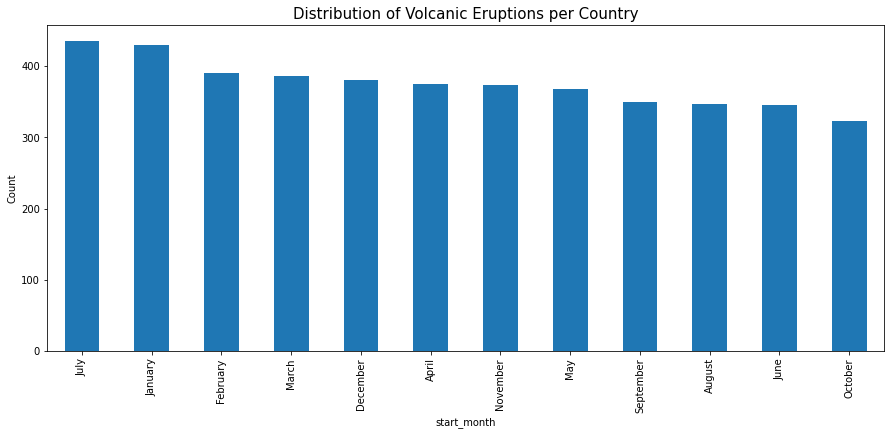

In [ ]:
fig = plt.figure(figsize=(15, 6)) 
datetime.groupby('start_month')['volcano_name'].count().sort_values(ascending=False).plot(kind='bar')

plt.title('Distribution of Volcanic Eruptions per Country', size=15)
plt.ylabel('Count')

There is more voclanic activity in July and January than in other months.

####***Visualisations***

#####Distribution of number of volcanic eruptions per country

Text(0.5, 1.0, 'Distribution of Volcanic Eruptions per Country')

<Figure size 720x288 with 0 Axes>

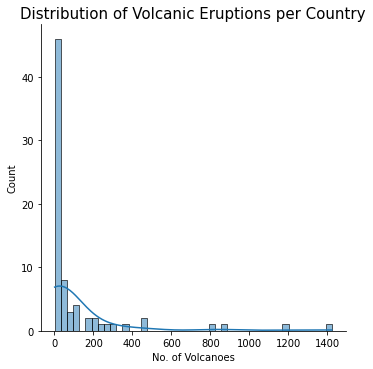

In [ ]:
fig = plt.figure(figsize=(10, 4)) 

data = confirmed_eruptions.groupby('country')['volcano_name'].count()
sns.displot(data=data, kde=True)
plt.xlabel('No. of Volcanoes')

plt.title('Distribution of Volcanic Eruptions per Country', size=15)

Over 40 countries have had just one confirmed eruption.<br/>
Very few countries, when compared to others, have over 800 eruptions

#####What tectonic zone has produced the most eruptions?

Text(0.5, 1.0, 'Number of Confirmed Eruptions in Tectonic Zones')

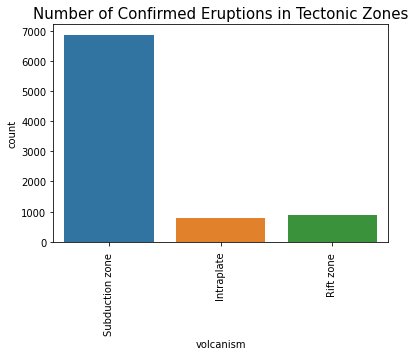

In [ ]:
fig = plt.figure(figsize=(6, 4)) 

chart = sns.countplot(data=confirmed_eruptions, x='volcanism')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.title('Number of Confirmed Eruptions in Tectonic Zones', size=15)

*Hypothesis Confirmed*
Subduction zone eruptions are the highest

#####Top ten countries with the highest number of confirmed volcanoes that has erupted?

Text(0, 0.5, 'Count')

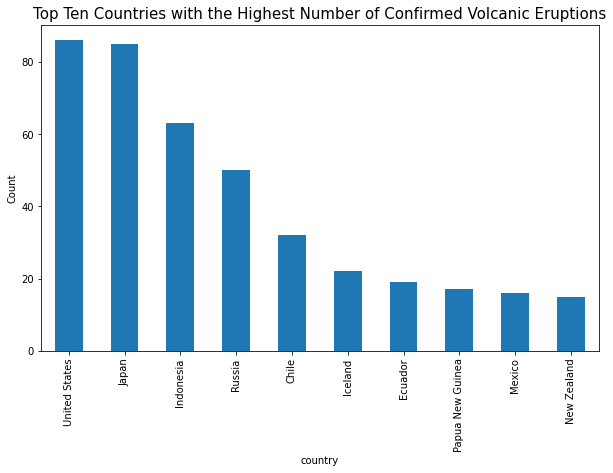

In [ ]:
uniques = confirmed_eruptions.drop_duplicates(subset=['volcano_name'], keep='last')

#plot
fig = plt.figure(figsize=(10, 6)) 
uniques.groupby('country')['volcano_name'].count().nlargest(10).plot(kind='bar')

plt.title('Top Ten Countries with the Highest Number of Confirmed Volcanic Eruptions', size=15)
plt.ylabel('Count')

The United States has the highest number of confirmed volcano eruptions with Japan following closely after.

#####Top ten countries with highest number of volcanic eruptions

Text(0, 0.5, 'Count')

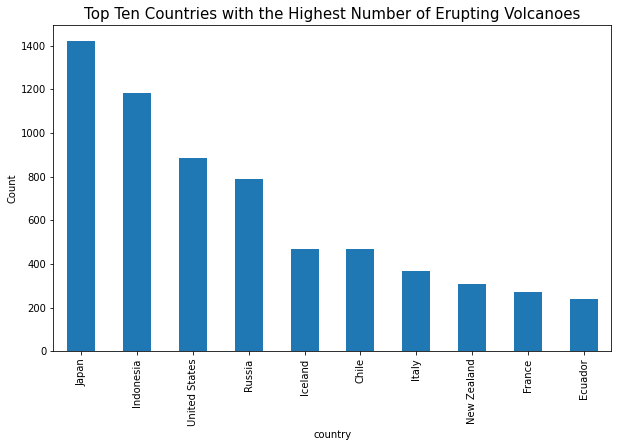

In [ ]:
fig = plt.figure(figsize=(10, 6)) 
confirmed_eruptions.groupby('country')['volcano_name'].count().nlargest(10).plot(kind='bar')

plt.title('Top Ten Countries with the Highest Number of Erupting Volcanoes', size=15)
plt.ylabel('Count')

Japan has the highest number of volcanoes erupting.

#####Which subregion has the highest number of confirmed volcanic eruptions?

In [ ]:
confirmed_eruptions.groupby(['subregion', 'country'])['volcano_name'].count().nlargest(1)

subregion            country
Kamchatka Peninsula  Russia     671
Name: volcano_name, dtype: int64

Kamchatka Peninsula in Russia has experienced 671 volcanic eruptions

#####How many volcanoes are in Kamchatka Peninsula?

In [ ]:
len(confirmed_eruptions[confirmed_eruptions['subregion']=='Kamchatka Peninsula'].groupby('volcano_name')['volcano_name'].count())

36

Kamchatka Peninsula has 36 erupted volcanoes

#####How many confirmed volcanoe eruptions in a year?

In [ ]:
count = confirmed_eruptions.groupby('start_year')['volcano_name'].count().to_frame()

Text(0, 0.5, 'Count')

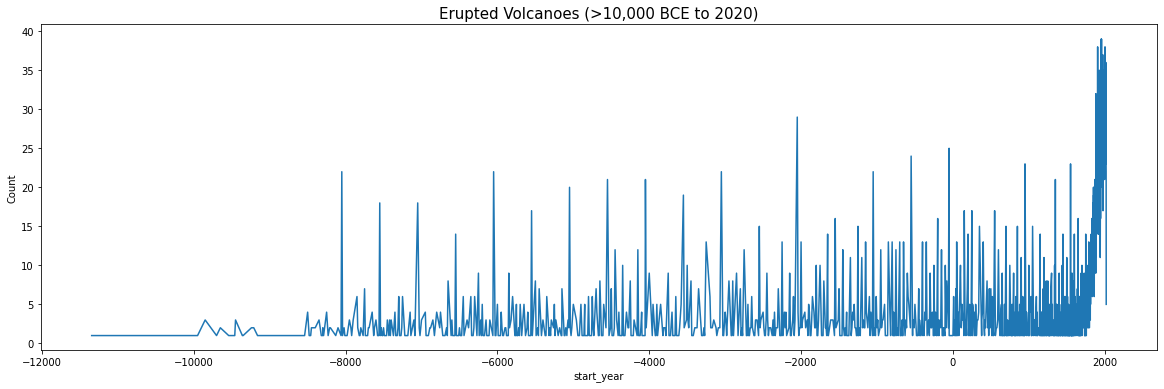

In [ ]:
fig = plt.figure(figsize=(20, 6)) 
sns.lineplot(data=count, x='start_year', y='volcano_name')

plt.title('Erupted Volcanoes (>10,000 BCE to 2020)', size=15)
plt.ylabel('Count')

In [ ]:
trimmed = count.loc[1800:2020]

Text(0, 0.5, 'Count')

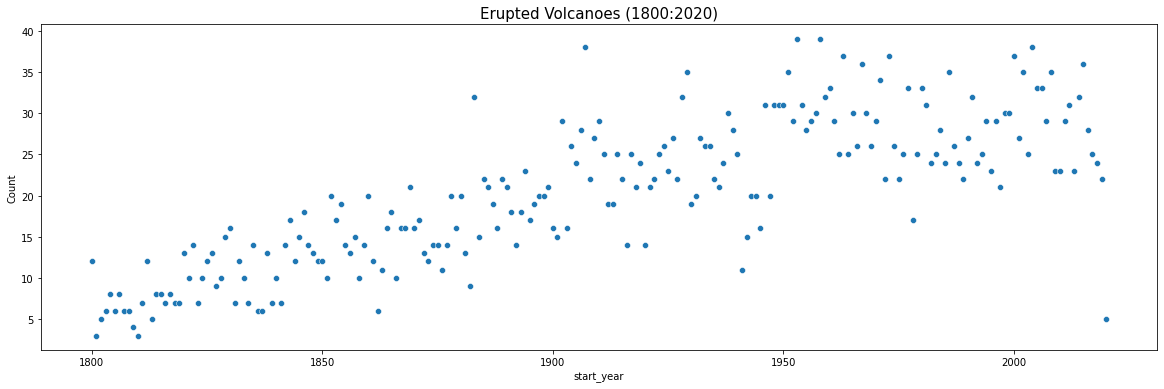

In [ ]:
fig = plt.figure(figsize=(20, 6)) 
sns.scatterplot(data=trimmed, x='start_year', y='volcano_name')

plt.title('Erupted Volcanoes (1800:2020)', size=15)
plt.ylabel('Count')

There has been a general spike (upward trend) in the number of volcanic eruptions per year

####***More Analysis***

#####What has been the largest and most explosive volcanic eruptions?

Make use of the Volcanic Explosive Index (VEI) numbers

In [ ]:
#filter and leave only concerned columns
dang_cols = ['volcano_name', 'vei', 'country', 'crust_thickness', 'volcanism', 'crust'] 
dangerous = confirmed_eruptions[dang_cols]

In [ ]:
#find the highest occuring explosivity index in the dataset
dangerous['vei'].max()

7.0

The highest level of volcanic eruption is 7

In [ ]:
#discover volcanoes with vei = 7
dangerous[dangerous['vei']==7]

,volcano_name,vei,country,crust_thickness,volcanism,crust
409,Kikai,7.0,Japan,< 15 km,Subduction zone,Oceanic crust
2285,Rinjani,7.0,Indonesia,>25 km,Subduction zone,Continental crust
7160,Tambora,7.0,Indonesia,>25 km,Subduction zone,Continental crust
7425,Santorini,7.0,Greece,>25 km,Subduction zone,Continental crust
8044,Changbaishan,7.0,China-North Korea,>25 km,Intraplate,Continental crust
9430,"Blanco, Cerro",7.0,Argentina,>25 km,Subduction zone,Continental crust
9442,Crater Lake,7.0,United States,>25 km,Subduction zone,Continental crust
9536,Kurile Lake,7.0,Russia,>25 km,Subduction zone,Continental crust


*Hypothesis Confirmed* <br/>
The assumption that the most volcanic eruptions occur at the subduction zone is confirmed. As seen in the image above, intreplate is also within the subduction zone when it is on the continental crust.

According to the reference index by Chris Newhall and Stephen Self, the above volcanoes were so dangerous, and released materials up to the tone of >100km in volume and >40km of plume (mixtures of volcanic particles, gases, and entrained air), and are considered super-colossal.<br/>

Japan is the only country where this happened in the Oceanic Crust

##Bonus

Investigate the correlation of increased volcanic activities to global temperature change

In [ ]:
#import NASA global temperature change data
global_temps = pd.read_table('https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt', header=2, delim_whitespace=' ')

In [ ]:
global_temps.head(3)

,Year,No_Smoothing,Lowess(5)
0,----------------------------,NaN,NaN
1,1880,-0.16,-0.08
2,1881,-0.07,-0.12


In [ ]:
global_temps.drop([0], inplace=True) #drop the first column

Text(0, 0.5, 'Temperature Change')

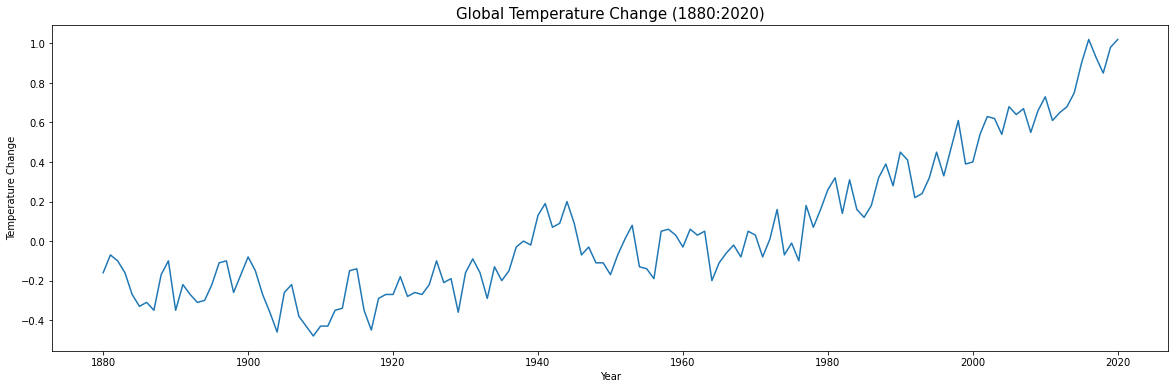

In [ ]:
fig = plt.figure(figsize=(20, 6)) 
sns.lineplot(data=global_temps, x='Year', y='No_Smoothing')

plt.title('Global Temperature Change (1880:2020)', size=15)
plt.ylabel('Temperature Change')

Plot together

In [ ]:
#merge data
global_temps['Year'] = global_temps['Year'].astype('float64') #convert year to float

filter = count.loc[1880:2020]
temp_comparison = filter.merge(global_temps, left_on=filter.index, right_on='Year', how='left')

Text(0, 0.5, 'Count')

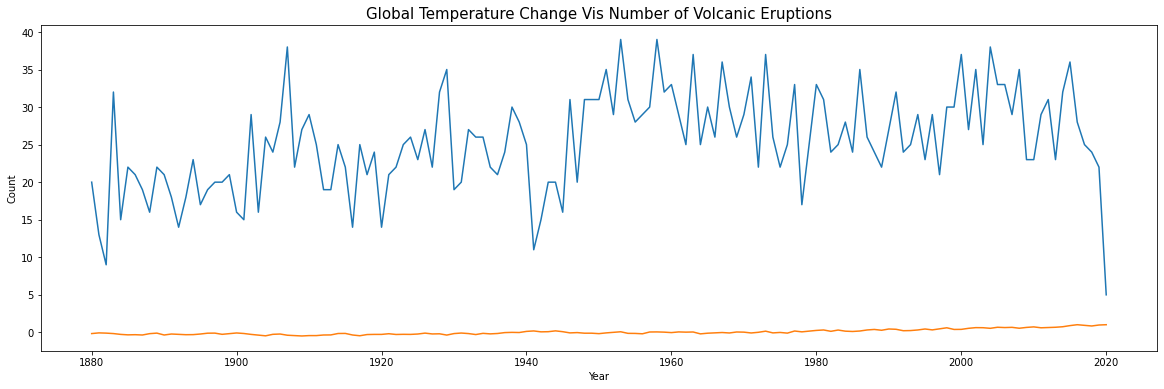

In [ ]:
fig = plt.figure(figsize=(20, 6)) 
sns.lineplot(data=temp_comparison, x='Year', y='volcano_name')
sns.lineplot(data=temp_comparison, x='Year', y='No_Smoothing')
plt.title('Global Temperature Change Vis Number of Volcanic Eruptions', size=15)
plt.ylabel('Count')

Text(0, 0.5, 'number of confirmed volcanic eruptions')

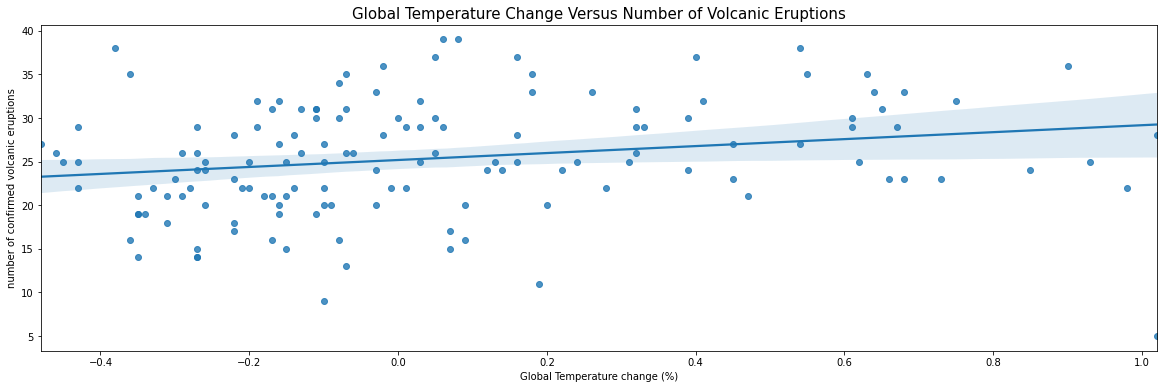

In [ ]:
fig = plt.figure(figsize=(20, 6)) 
sns.regplot(data=temp_comparison, x='No_Smoothing', y='volcano_name')
plt.title('Global Temperature Change Versus Number of Volcanic Eruptions', size=15)
plt.xlabel('Global Temperature change (%)')
plt.ylabel('number of confirmed volcanic eruptions')

The above plot clearly shows that there is very little correlation between the volcanic eruptions and temperature rise.

#### Active Volcanic activity

In [ ]:
active = confirmed_eruptions[confirmed_eruptions['end_year'].isnull()]

In [ ]:
active_cnt = active.groupby('start_year')['volcano_name'].count().to_frame()

Text(0, 0.5, 'Count')

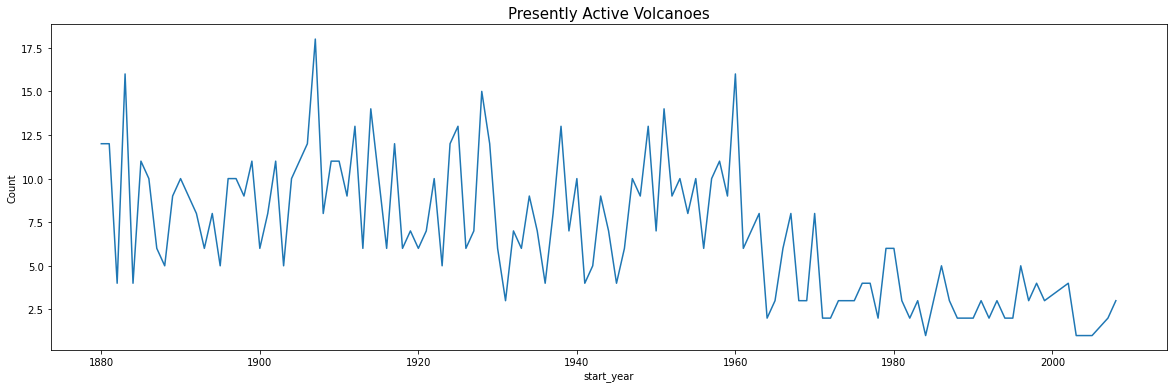

In [ ]:
fig = plt.figure(figsize=(20, 6)) 
sns.lineplot(data=active_cnt[1880:2020], x='start_year', y='volcano_name')

plt.title('Presently Active Volcanoes', size=15)
plt.ylabel('Count')

The number of voclanoes still active till date has reduced.

###Summary

**Conclusions**

1. There was a lot of volcanic activity, but only few were confirmed eruptions. 
2. The Subduction zone produces the highest volcanic activity and the highest number of confirmed erupted volcanoes.
3. The number of confirmed erupted volcanoes is in an upward trend.
4. There is more voclanic activity in July and January than in other months.
5. The United States has the highest number of volcanic eruptions however, Japan has more volcanoes producing eruptions than the United States.
6. The largest subregion with erupting volcanoes is Kamchatka Peninsula in Russia. 
7. The number of active volcanoes is lower today, than it was over 100 years ago.
8. There is very little correlation between the volcanic eruptions and temperature rise



**References:**
1. https://volcano.si.edu/faq/index.cfm?question=highestvolcano
2. http://ete.cet.edu/gcc/?/volcanoes_explosivity/
3. https://volcanoes.usgs.gov/vsc/glossary/vei.html#:~:text=Volcanic%20Explosivity%20Index%20(VEI)%20is,to%20determine%20the%20explosivity%20value.
4. https://www.britannica.com/science/volcano/Volcanoes-related-to-plate-boundaries